In [1]:
import experiment
import sys
sys.path.append("../../modules/")
from helper import *
# ---
import lasagne
from lasagne.layers import *
import theano
from theano import tensor as T
# ---
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
model_name = "exp1.model"
args = dict()
args["input_shape"] = (None, 1, 60, 60)
args["max_epochs"] = 100
args["alpha"] = 0.01
args["seed"] = 0
args["batch_size"] = 128
args["out_model"] = model_name
args["out_stats"] = "exp1"
net = experiment.get_net(args)
net.load_params_from(model_name)
net.initialize()
print net

Loaded parameters to layer 'conv2d2' (shape 20x1x5x5).
Loaded parameters to layer 'conv2d2' (shape 20).
Loaded parameters to layer 'conv2d4' (shape 20x20x5x5).
Loaded parameters to layer 'conv2d4' (shape 20).
Loaded parameters to layer 'dense6' (shape 320x20).
Loaded parameters to layer 'dense6' (shape 20).
Loaded parameters to layer 'dense7' (shape 20x6).
Loaded parameters to layer 'dense7' (shape 6).
Loaded parameters to layer 'conv2d10' (shape 32x1x9x9).
Loaded parameters to layer 'conv2d10' (shape 32).
Loaded parameters to layer 'conv2d12' (shape 32x32x7x7).
Loaded parameters to layer 'conv2d12' (shape 32).
Loaded parameters to layer 'dense14' (shape 128x10).
Loaded parameters to layer 'dense14' (shape 10).
NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x107b4f090>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x1091c3d10>,
     custom_scores=None,
     layers=[<lasagne.layers.dense.DenseLayer object 

//anaconda/lib/python2.7/site-packages/nolearn-0.6a0.dev0-py2.7.egg/nolearn/lasagne/base.py:250: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


In [3]:
layers = net.get_all_layers()
l_trans = None
for layer in layers:
    if isinstance(layer, TransformerLayer):
        l_trans = layer

X = T.tensor4('x')
get_trans_out = theano.function([X], lasagne.layers.get_output(l_trans, X))

In [4]:
#train_set, _, _ = load_mnist("../../data/mnist.pkl.gz")
#Xt, _ = train_set
train_set = load_cluttered_mnist_train_only("../../data/mnist_cluttered_60x60_6distortions.npz")
Xt, _ = train_set

//anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


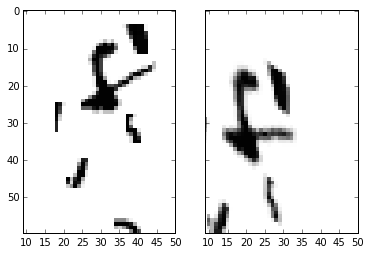

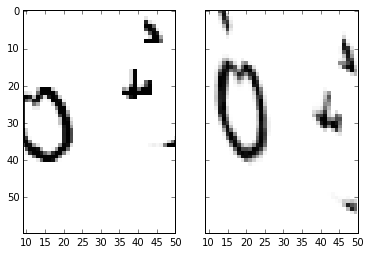

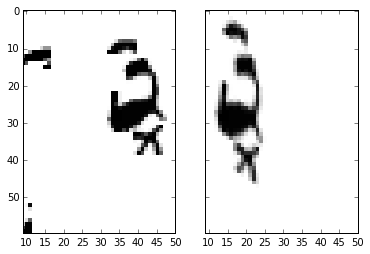

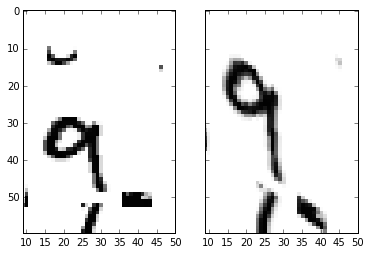

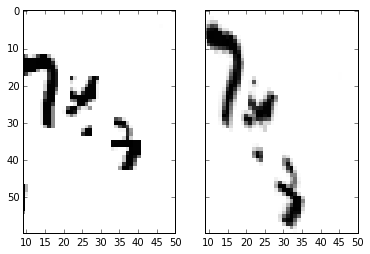

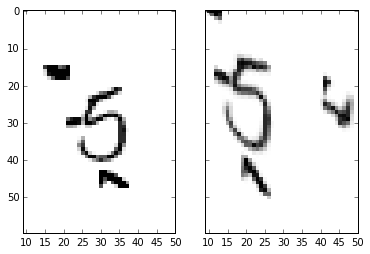

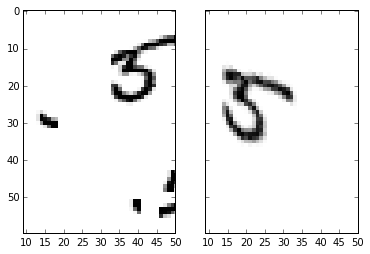

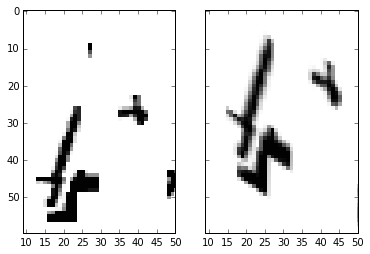

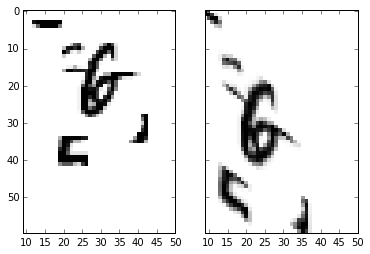

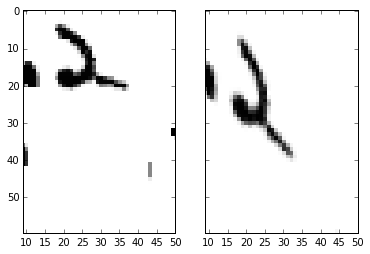

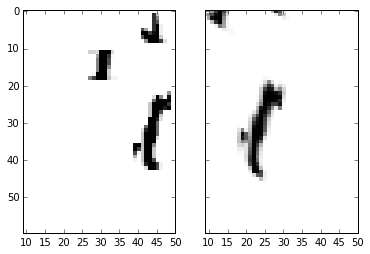

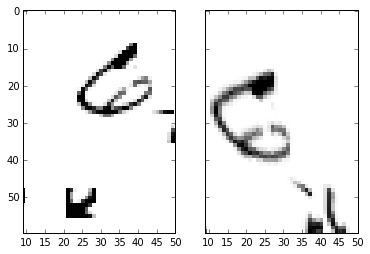

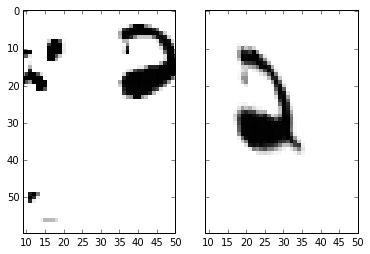

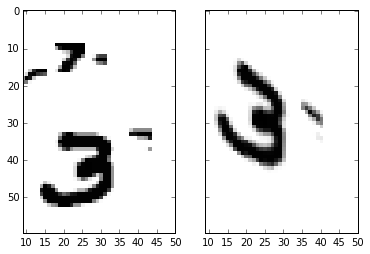

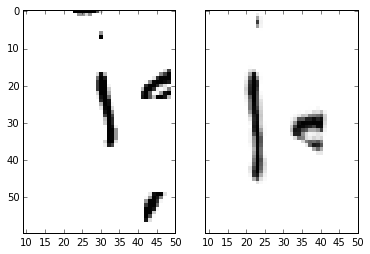

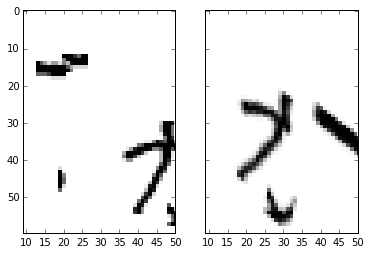

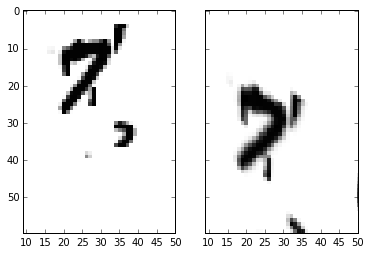

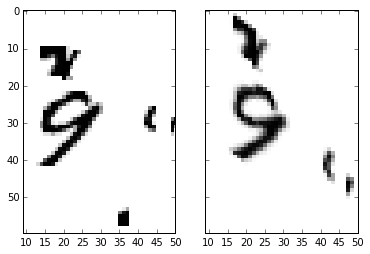

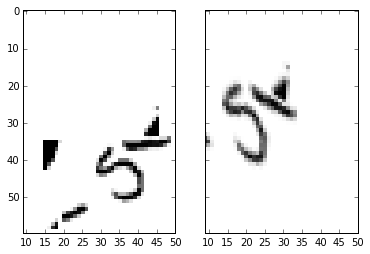

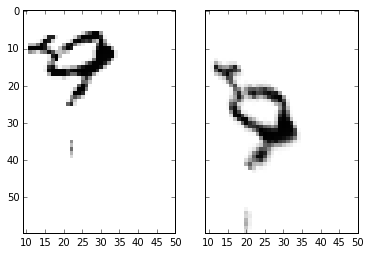

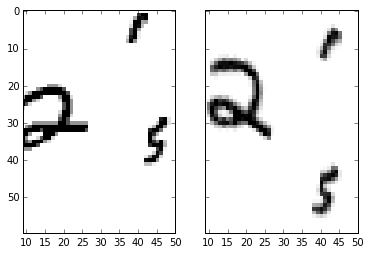

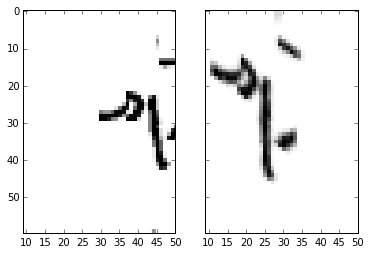

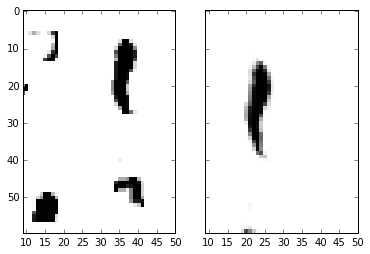

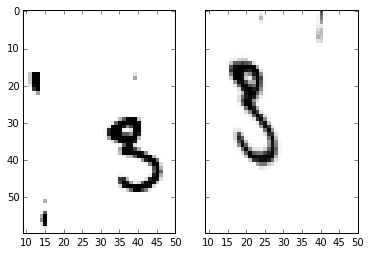

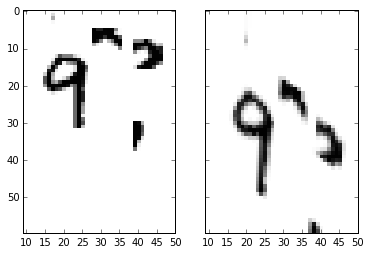

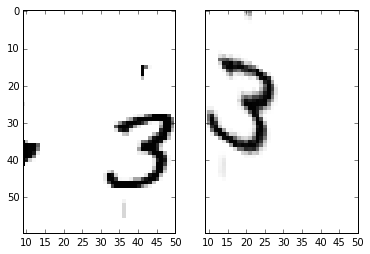

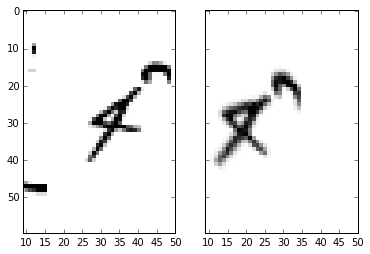

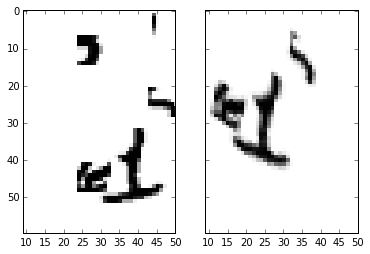

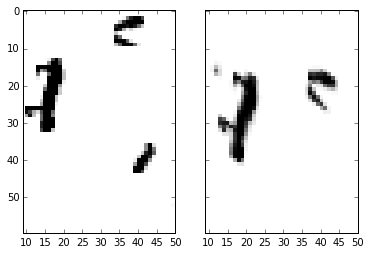

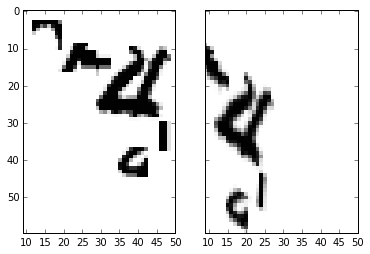

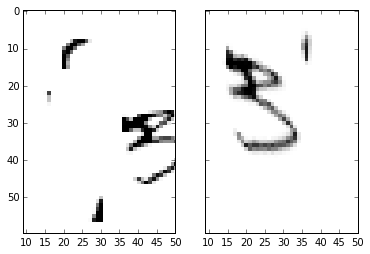

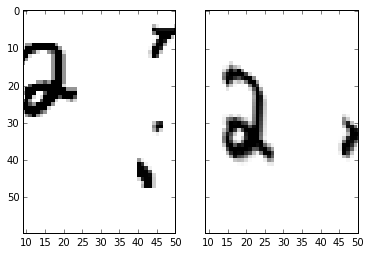

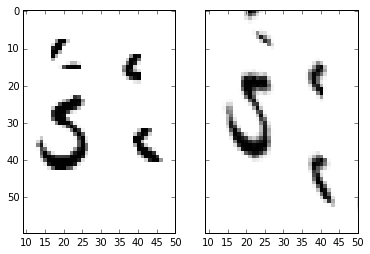

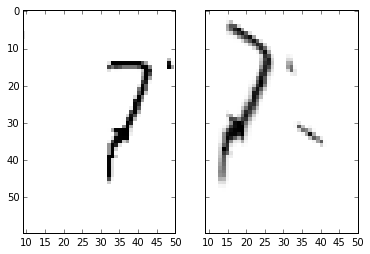

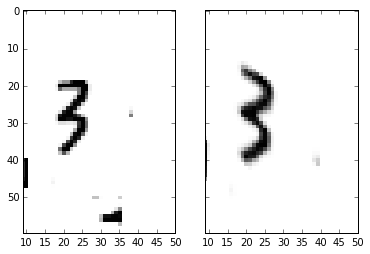

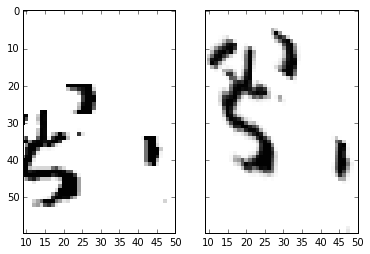

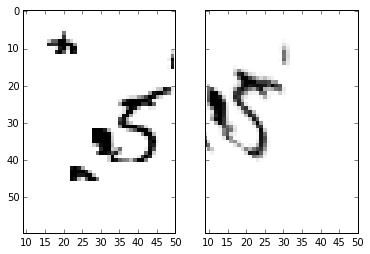

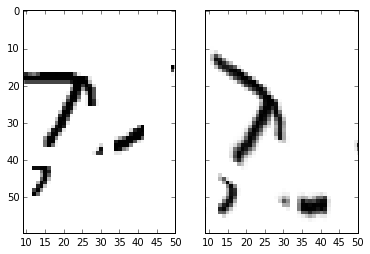

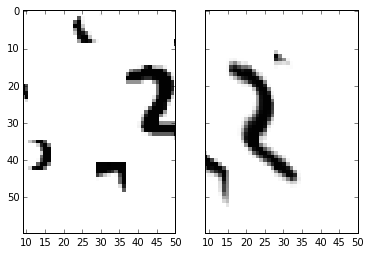

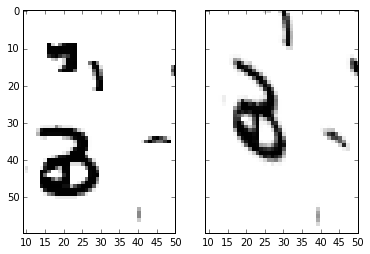

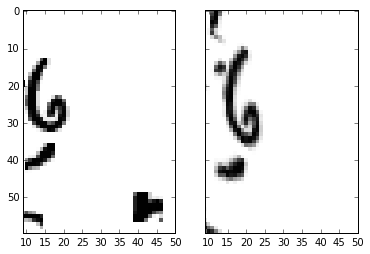

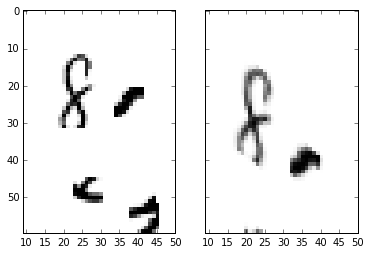

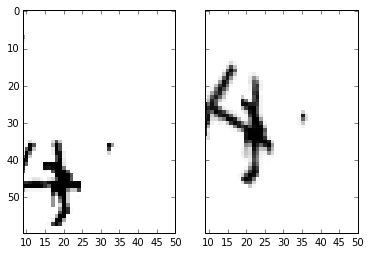

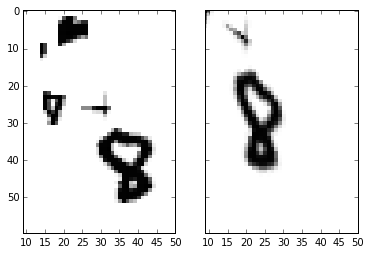

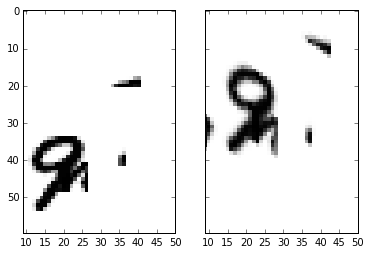

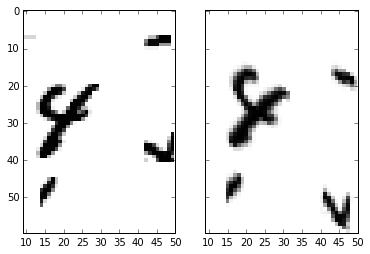

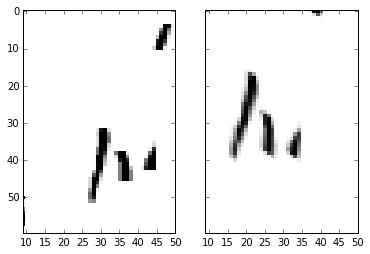

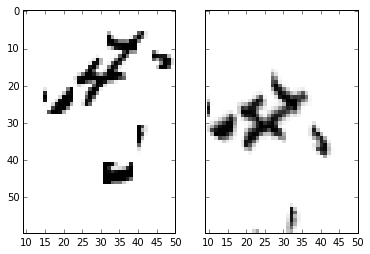

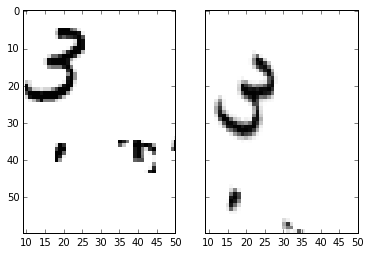

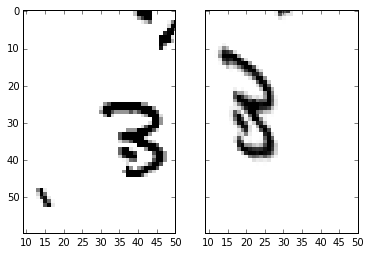

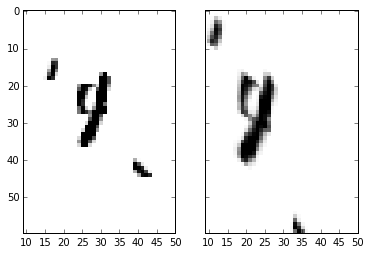

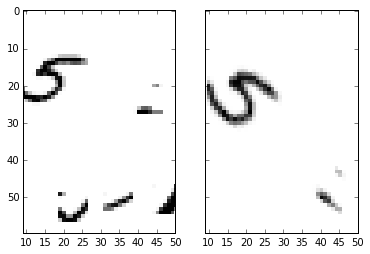

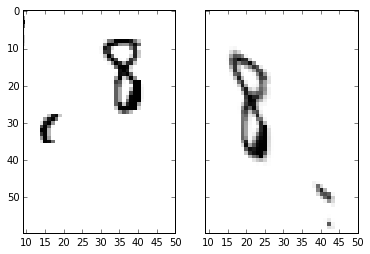

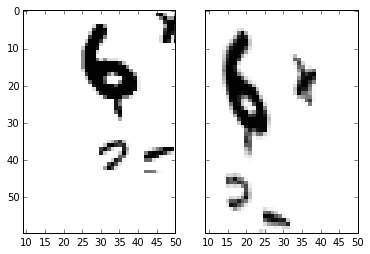

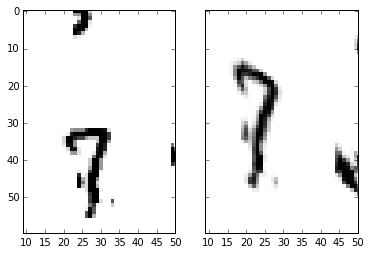

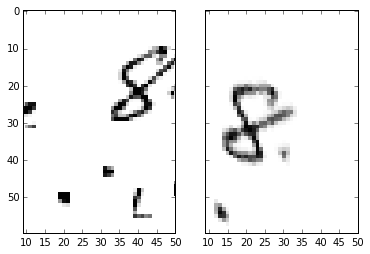

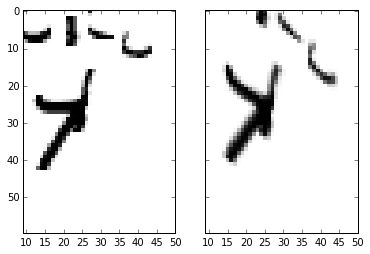

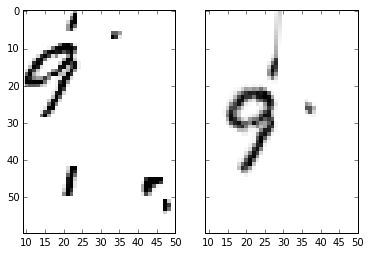

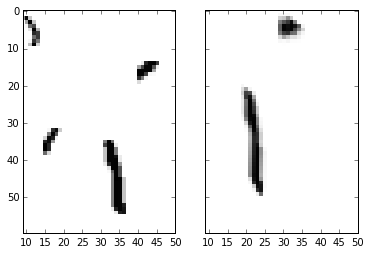

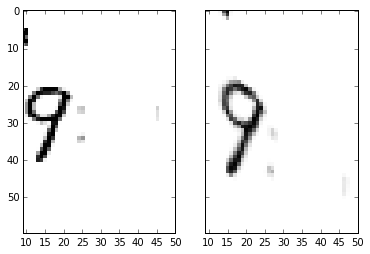

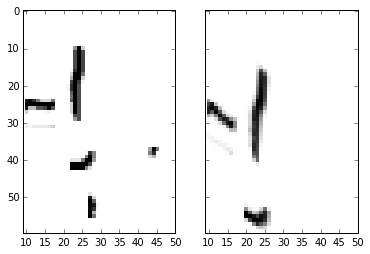

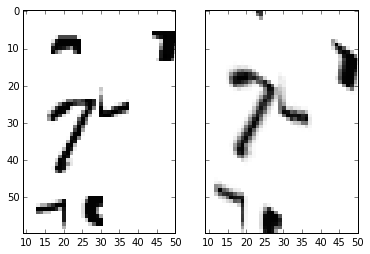

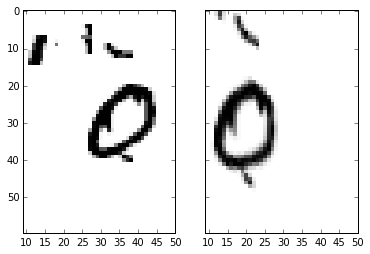

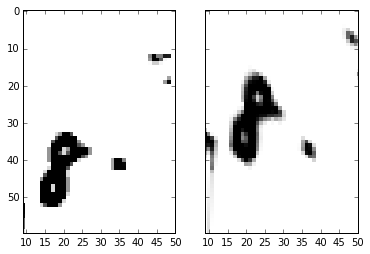

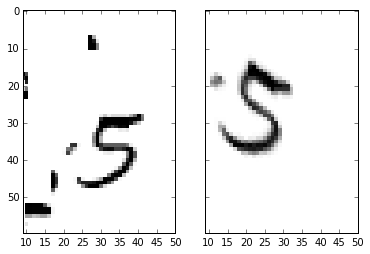

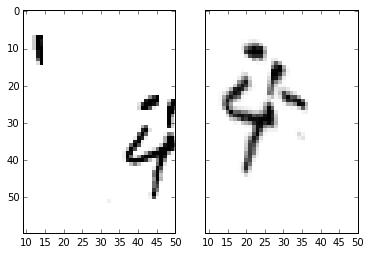

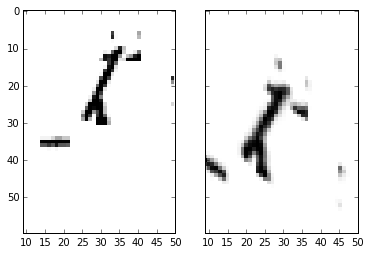

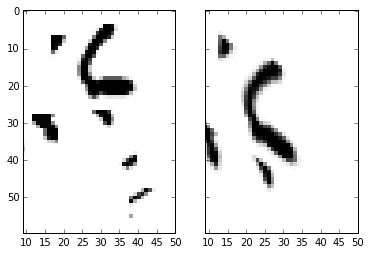

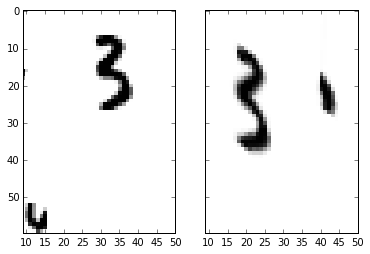

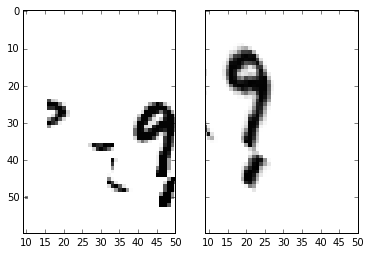

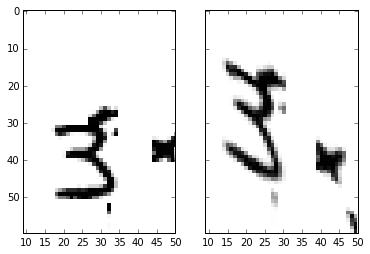

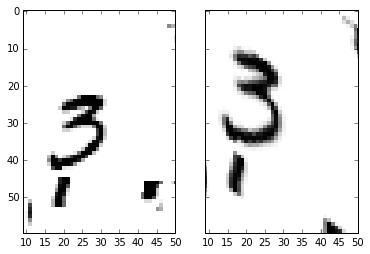

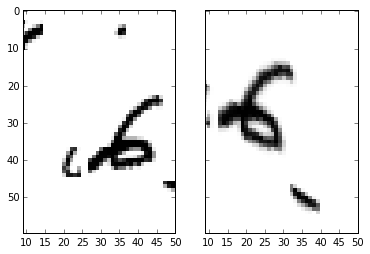

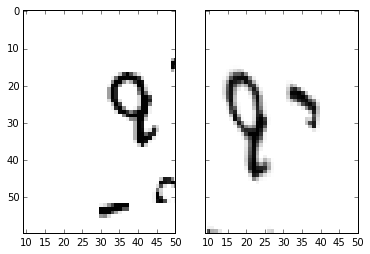

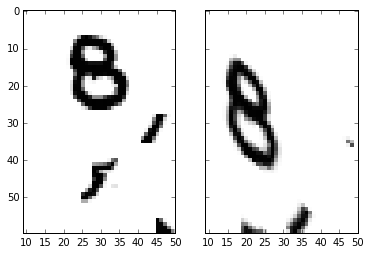

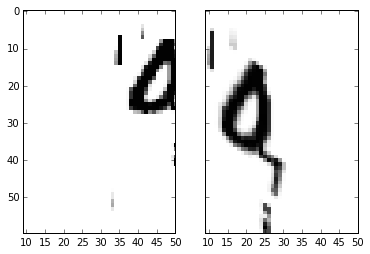

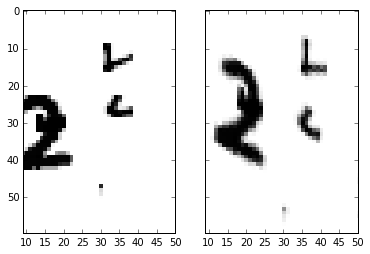

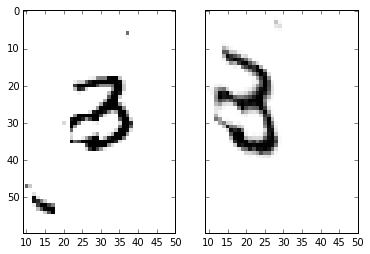

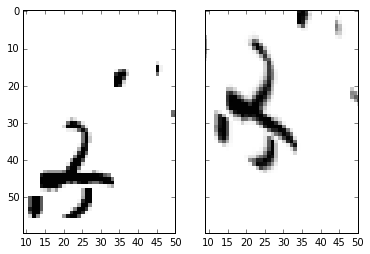

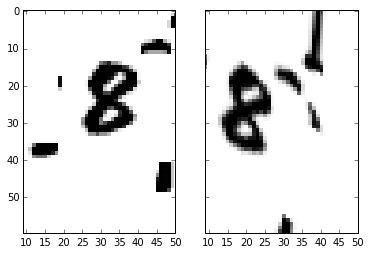

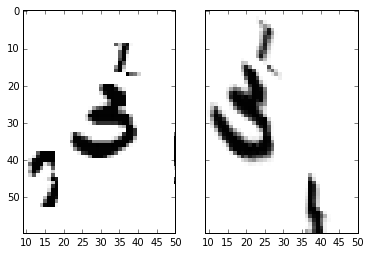

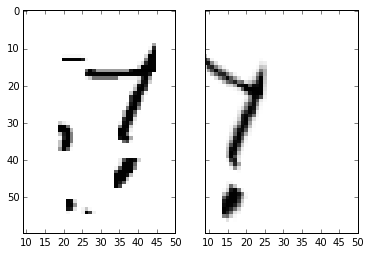

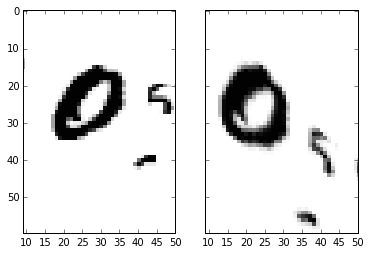

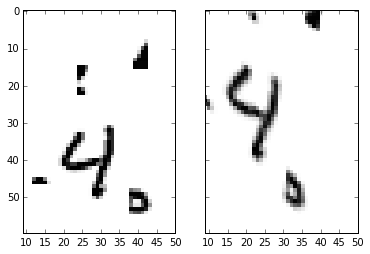

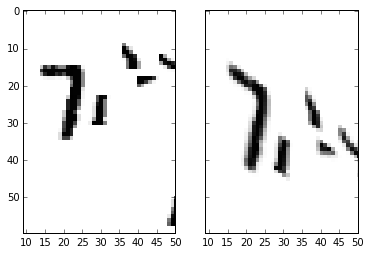

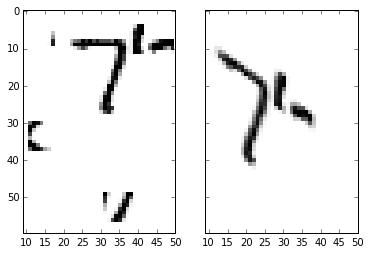

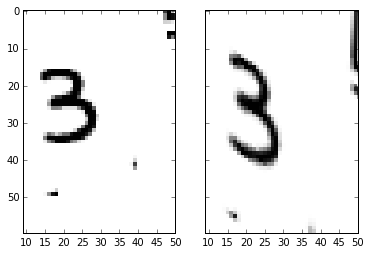

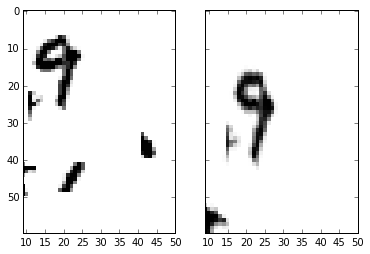

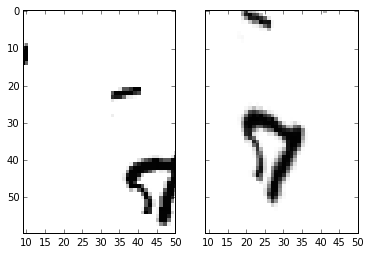

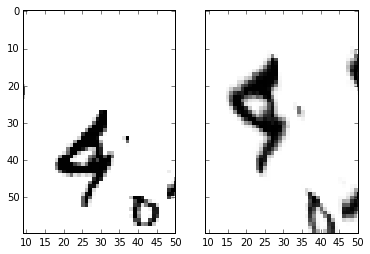

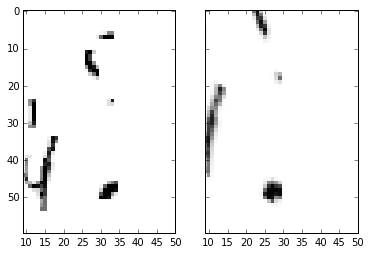

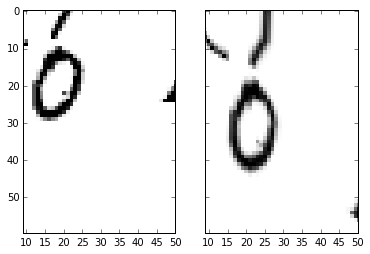

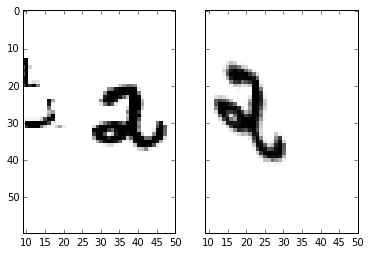

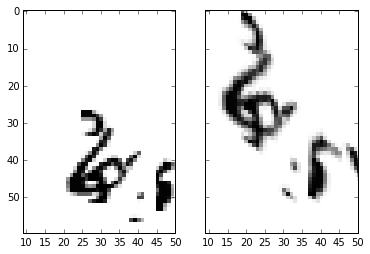

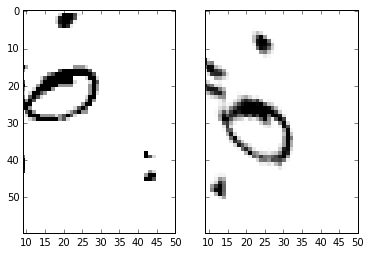

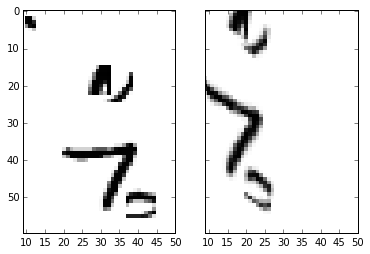

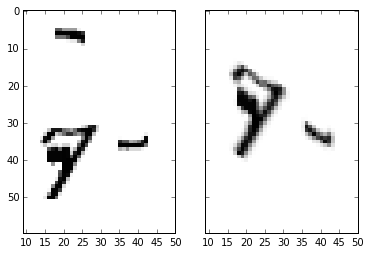

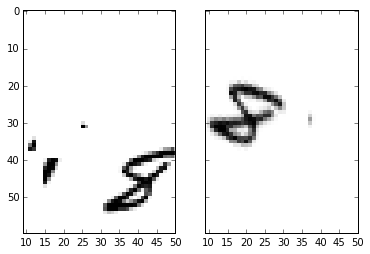

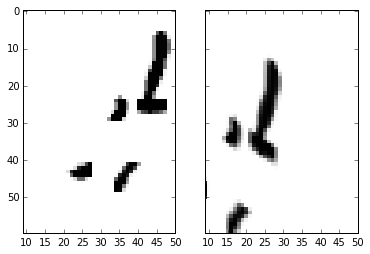

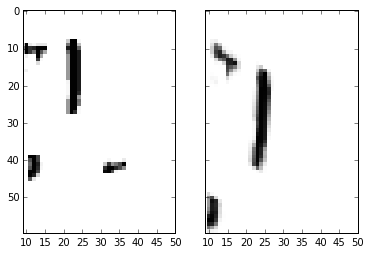

In [5]:
for idx in range(0, 100):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(Xt[idx:idx+1][0][0], interpolation='nearest', vmin=0, vmax=1, cmap='Greys')
    ax2.imshow(get_trans_out(Xt[idx:idx+1])[0][0], interpolation='nearest', vmin=0, vmax=1, cmap='Greys')
    f.savefig("transforms/%i.png" % idx)